# Weather in Szeged

## Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Loading Data

In [2]:
data = pd.read_csv('cleaned_weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Daily Summary,Year,Month,Day,Hour
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,3,31,22
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,3,31,23
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,4,1,0
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,4,1,1
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,4,1,2


## Data Cleaning and Filtering

In [3]:
# Converting 'Formatted Date' to datetime
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)

# Extracting useful information from the datetime column
data['Year'] = data['Formatted Date'].dt.year
data['Month'] = data['Formatted Date'].dt.month
data['Day'] = data['Formatted Date'].dt.day
data['Hour'] = data['Formatted Date'].dt.hour


# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Drop rows with missing values
data = data.dropna()

# Checking for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nDuplicates: {duplicates}")

# Droppping duplicates
data = data.drop_duplicates()

data.rename(columns={'Loud Cover': 'Cloud Cover'}, inplace=True)

# Saving the cleaned dataset to a new file
data.to_csv('cleaned_weatherHistory.csv', index=False)

print("\nCleaned Data:")
print(data.head())


Missing Values:
Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Cloud Cover                 0
Pressure (millibars)        0
Daily Summary               0
Year                        0
Month                       0
Day                         0
Hour                        0
dtype: int64

Duplicates: 0

Cleaned Data:
             Formatted Date        Summary Precip Type  Temperature (C)  \
0 2006-03-31 22:00:00+00:00  Partly Cloudy        rain         9.472222   
1 2006-03-31 23:00:00+00:00  Partly Cloudy        rain         9.355556   
2 2006-04-01 00:00:00+00:00  Mostly Cloudy        rain         9.377778   
3 2006-04-01 01:00:00+00:00  Partly Cloudy        rain         8.288889   
4 2006-04-01 02:00:00+00:00  Mostly Cloudy        rain         8.755556   

   Appare

In [4]:
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Daily Summary,Year,Month,Day,Hour
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,3,31,22
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,3,31,23
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,4,1,0
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,4,1,1
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95907,2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,2016,9,9,17
95908,2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,2016,9,9,18
95909,2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,2016,9,9,19
95910,2016-09-09 20:00:00+00:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,2016,9,9,20


## Standardizing Data:

In [45]:
# Separating features and target
X = data[['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 
          'Wind Bearing (degrees)', 'Visibility (km)', 'Cloud Cover', 
          'Pressure (millibars)', 'Year', 'Month', 'Day', 'Hour']]
y = data['Temperature (C)']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_standardised = pd.DataFrame(X_scaled, columns = X.columns)

# Split data into train and test:
X_train, X_test, y_train, y_test = train_test_split(X_standardised, y, test_size=0.2, shuffle=True)

In [46]:
def train_and_evaluate_model(model):
    # Fit model and use model to predict:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate the evaluation metrics:
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**0.5
    
    return model, r2, mse, rmse

## Model 1: Ridge Regression:

In [47]:
alpha_values = np.arange(0,1.1,0.001)
min_mse = float('inf')
best_model = None

for value in alpha_values:
    ridge = Ridge(alpha=value)
    mse = train_and_evaluate_model(ridge)[2]
    
    if mse < min_mse:
        min_mse = mse
        best_model = ridge

min_mse, best_model

(0.9130888420669445, Ridge(alpha=0.674))

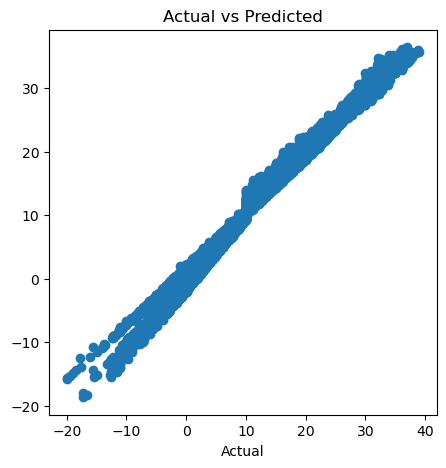

In [49]:
ridge = best_model
train_and_evaluate_model(ridge)

# Visualise the results:
y_pred = ridge.predict(X_test)
f, ax = plt.subplots(figsize=(5,5))
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_label('Predicted')
ax.scatter(y_test, y_pred)
plt.show()

In [50]:
# Printing the coefficients
b0 = float(ridge.intercept_)
coeff = pd.DataFrame(ridge.coef_, X.columns, columns = ['Coefficient'])
print("Intercept:", float(b0))
print(coeff)

Intercept: 11.939843076680742
                          Coefficient
Apparent Temperature (C)     9.343489
Humidity                    -0.287705
Wind Speed (km/h)            0.556324
Wind Bearing (degrees)      -0.041948
Visibility (km)              0.033869
Cloud Cover                  0.000000
Pressure (millibars)        -0.022733
Year                         0.017982
Month                        0.018050
Day                         -0.016102
Hour                         0.000015


## Model 2: Random Forest Regressor:

In [56]:
number_estimators = list(range(1,101))
max_depth = list(range(1,11))
min_mse = float('inf')
best_model = None

for estimator in number_estimators:
    for depth in max_depth:
        RF = RandomForestRegressor(n_estimators=estimator, max_depth=depth)
        mse = train_and_evaluate_model(RF)[2]
    
        if mse < min_mse:
            min_mse = mse
            best_model = RF

min_mse, best_model

(0.007705863993489279, RandomForestRegressor(max_depth=10, n_estimators=58))

(RandomForestRegressor(max_depth=10, n_estimators=58), 0.999914969587898, 0.007762637290060794, 0.08810583005715793)


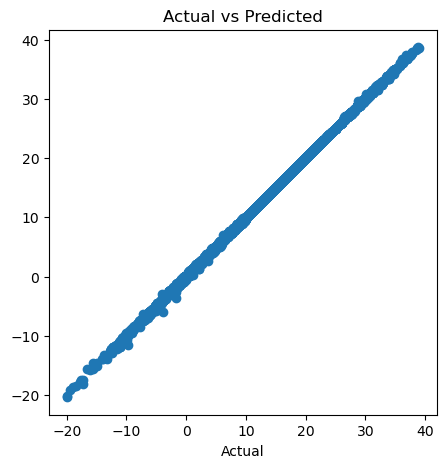

In [57]:
RF = best_model
print(train_and_evaluate_model(RF)[:])

# Visualise the results:
y_pred = RF.predict(X_test)
f, ax = plt.subplots(figsize=(5,5))
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_label('Predicted')
ax.scatter(y_test, y_pred)
plt.show()

In [58]:
RF.feature_importances_

array([9.90190673e-01, 7.71403050e-04, 9.00728568e-03, 8.47599387e-07,
       1.13428332e-05, 0.00000000e+00, 1.10492904e-05, 2.33528171e-06,
       8.59612310e-07, 2.32399798e-06, 1.87978128e-06])